<a href="https://colab.research.google.com/github/DavideScassola/PML2024/blob/main/Notebooks/02_numpy_pandas_sklearn/023_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2.3: Introduction to scikit-learn

This is a brief tutorial on scikit-learn, crafted from online material, in particular from the [scikit-learn webpage](https://scikit-learn.org/stable/).

Scikit-learn is a python package that implements a very wide set of tools useful for machine learning.

### What can we do with scikit-learn?

* [Data preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)
* [Dimensionality reduction of large datasets](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
* [Supervised learning for both classification and regression](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
* [Unsupervised learning and clustering](https://scikit-learn.org/stable/unsupervised_learning.html)
* [Model selection](https://scikit-learn.org/stable/model_selection.html#model-selection)
* [Composing processing steps together as Pipelines](https://scikit-learn.org/stable/modules/compose.html)

The main strength the scikit-learn API has is its consistency: [all estimators, transformers, etc share the same main design](https://scikit-learn.org/stable/glossary.html#glossary-estimator-types), enabling very flexible compositions of different machine learning algorithms.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Datasets
Scikit-learn comes with some built-in datasets for use. These are in the module `dataset`.
Each datasets contains input data (the `data` key in the dictionary), targets, and input and target names. It may contain also additional information, e.g. raw images in case of image datasets. Pandas dataframes can be used as well.

These are the attibutes of digits  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
<class 'numpy.ndarray'>
(1797, 8, 8)
[[ 0.  0. 10. 14.  8.  1.  0.  0.]
 [ 0.  2. 16. 14.  6.  1.  0.  0.]
 [ 0.  0. 15. 15.  8. 15.  0.  0.]
 [ 0.  0.  5. 16. 16. 10.  0.  0.]
 [ 0.  0. 12. 15. 15. 12.  0.  0.]
 [ 0.  4. 16.  6.  4. 16.  6.  0.]
 [ 0.  8. 16. 10.  8. 16.  8.  0.]
 [ 0.  1.  8. 12. 14. 12.  1.  0.]]


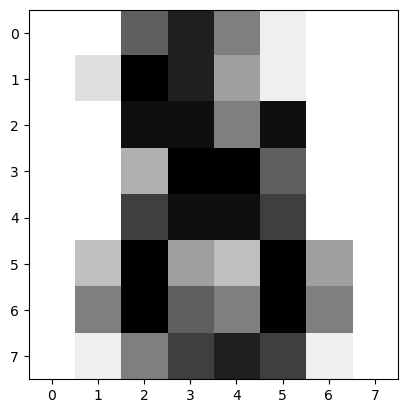

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
print("These are the attibutes of digits ", dir(digits))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r) 

print(type(digits.images[-1]))
#these are 8x8 pixels images . 
print(digits.images.shape)
print(digits.images[-1])

In [3]:
# we can in principle reshape the image to trasnform in into a dataset
#this transforms a single input point in a row
print(digits.images[-1].reshape((1, -1))) 
# this transforms the whole input images into a row
digits.images.reshape((digits.images.shape[0], -1))


[[ 0.  0. 10. 14.  8.  1.  0.  0.  0.  2. 16. 14.  6.  1.  0.  0.  0.  0.
  15. 15.  8. 15.  0.  0.  0.  0.  5. 16. 16. 10.  0.  0.  0.  0. 12. 15.
  15. 12.  0.  0.  0.  4. 16.  6.  4. 16.  6.  0.  0.  8. 16. 10.  8. 16.
   8.  0.  0.  1.  8. 12. 14. 12.  1.  0.]]


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
#though the dataset is already prepared!
print(digits.data)
print(digits.feature_names)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', '

In [14]:
#We can also use pandas dataframes:
df = pd.DataFrame(data=digits.data,
                  columns=digits.feature_names)
df['target'] = digits.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### Basic Operations on  Datasets
A cool thing of scikit-learn is that is has functions to perform routine operations on datasets, including: 
* generating Test and Train datasets. The relevant function is `train_test_split` from the module `model_selection`.
* Standardising input data. The function scale of the module `preprocessing` provides a quick and easy way to perform this operation on a single array-like dataset.


A very important parameter of `train_test_split` is `stratify`. If left as `None`, `train_test_split` will uniformly randomly select rows to use in the train and test sets. This criteria may produce unbalanced sets (i.e. the label distribution may be different between the train and test sets). For very big datasets, or datasets are well balanced to begin with, this is usually not a problem; but when the datasets are smaller, this can have serious consequences. For example, it may happen that some labels can be completely abscent in the train or test set, and the learnt models will work poorly.

If you supply an array to `stratify`, the train and test split is done on the rows corresponding to each of the unique values of the array.

In [26]:
from sklearn.model_selection import train_test_split
# First lets see the label distribution for the train and test sets without stratification.
print(np.unique(digits.target, return_counts=True))
print('---')
digits_X_train, digits_X_test, digits_y_train, digits_y_test = \
    train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)
print('Without stratify')
a = {'original': digits.target,
     'train': digits_y_train,
     'test': digits_y_test}
for kind, vals in a.items():
    print(kind)
    print({label: c / len(vals) for label, c in zip(*np.unique(vals, return_counts=True))})
    print('---')

# Now lets see what happens when we use stratify

digits_X_train2, digits_X_test2, digits_y_train2, digits_y_test2 = \
    train_test_split(digits.data, digits.target, test_size=0.4, random_state=0,
                     stratify=digits.target)
a = {'original': digits.target,
     'train': digits_y_train2,
     'test': digits_y_test2}
print('\nUsing stratify')
for kind, vals in a.items():
    print(kind)
    print({label: c / len(vals) for label, c in zip(*np.unique(vals, return_counts=True))})
    print('---')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))
---
Without stratify
original
{0: 0.09905397885364496, 1: 0.10127991096271564, 2: 0.09849749582637729, 3: 0.1018363939899833, 4: 0.10072342793544797, 5: 0.10127991096271564, 6: 0.10072342793544797, 7: 0.09961046188091263, 8: 0.09682804674457429, 9: 0.1001669449081803}
---
train
{0: 0.10946196660482375, 1: 0.10111317254174397, 2: 0.09833024118738404, 3: 0.10482374768089053, 4: 0.10946196660482375, 5: 0.0862708719851577, 6: 0.09740259740259741, 7: 0.10575139146567718, 8: 0.08905380333951762, 9: 0.09833024118738404}
---
test
{0: 0.08344923504867872, 1: 0.10152990264255911, 2: 0.09874826147426982, 3: 0.09735744089012517, 4: 0.08762169680111266, 5: 0.12378303198887343, 6: 0.10570236439499305, 7: 0.09040333796940195, 8: 0.10848400556328233, 9: 0.10292072322670376}
---

Using stratify
original
{0: 0.09905397885364496, 1: 0.10127991096271564, 2: 0.09849749582637729, 3: 0.1018363939899833, 4: 0.10

#### Transformer API and Preprocessing

Scikit-learn has some API/ interfaces which are very useful to automate the learning process.
As data preprocessing has an important role in learning - typically dataset are standardised or normalised in some way - there several classes implementing the Transformer API. 

The two relevant methods of a transformer object are `fit()` and `transform()`. The first one is used to train the transformer, e.g. define the standardisation for each feature, the second one to apply the transformation to novel data. Transformer objects can be trained on the train datasets and then applied to test datasets, hence they should be the methods of choice.  


Data preprocessing is usually performed through the `Scaler` objects, which are of several types:
* `StandardScaler` performs classic standardisation;
* `MinMaxScaler` normalises data into [0,1], where 0 is the minimum and 1 is the maximum of each feature, but different ranges can be specified as well;
* `MaxAbsScaler` divides each feature for the absolute value, hence data is scaled in [-1,1];
* `RobustScaler` deals better with data with outliers, as it removes the median and scales the data according to the quantile range;

Other methods perform non-linear transformations:
* `QuantileTransformer` performs a non-linear transformation using quantiles. Better for outliers, but being non-linear, it breaks the correlation. 
* `Normalizer` scales individual samples to have unit norm. 

In [12]:
from sklearn import preprocessing
#Each scaler has some options, use help or refer to scikit-learn manual!
help(preprocessing.MinMaxScaler) 

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearily
 |  scales them down into a fixed range, where the largest occuring data point
 |  corresponds to the maximum value and the smallest one 

In [30]:
scaler = preprocessing.MinMaxScaler().fit(digits_X_train2)
digits_X_scaled = scaler.transform(digits_X_train2)
digits_X_test_scaled = scaler.transform(digits_X_test2)

print("Non standardised\n",digits_X_test2[:5,:])
print("Standardised\n",digits_X_test_scaled[:5,:])

Non standardised
 [[ 0.  1. 13. 13. 10.  0.  0.  0.  0.  1. 13. 16. 15.  0.  0.  0.  0.  0.
  12. 16. 16.  0.  0.  0.  0.  0. 16. 16. 12.  0.  0.  0.  0.  0. 15. 16.
  13.  1.  0.  0.  0.  0. 15. 16. 11.  0.  0.  0.  0.  0. 16. 16. 16.  5.
   0.  0.  0.  0. 14. 16. 15.  8.  1.  0.]
 [ 0.  0.  7. 15. 15.  2.  0.  0.  0.  0. 13.  6. 12.  6.  0.  0.  0.  0.
   0.  0. 15.  2.  0.  0.  0.  0.  0. 13. 10.  0.  0.  0.  0.  0.  0.  8.
  15. 12.  0.  0.  0.  3.  7.  0.  2. 15.  1.  0.  0.  2. 15.  6.  6. 16.
   1.  0.  0.  0.  4. 15. 16.  7.  0.  0.]
 [ 0.  0. 11.  7.  0.  0.  0.  0.  0.  5. 16.  3.  2. 14.  3.  0.  0.  9.
  15.  0. 12. 15.  0.  0.  0.  6. 16. 15. 16.  5.  0.  0.  0.  0.  6. 15.
  11.  0.  0.  0.  0.  0.  1. 16.  4.  0.  0.  0.  0.  0.  9. 12.  0.  0.
   0.  0.  0.  0. 13. 10.  0.  0.  0.  0.]
 [ 0.  0.  1. 13. 12.  5.  0.  0.  0.  0. 11. 16.  4. 13.  2.  0.  0.  2.
  16.  4.  0.  8.  5.  0.  0.  7. 12.  0.  0.  8.  8.  0.  0.  6. 12.  0.
   0.  5.  8.  0.  0.  3. 16.  0.  0.  

### Supervised Learning
Regression and classification in scikit-learn follow a [similar pattern](https://scikit-learn.org/stable/glossary.html#class-apis-and-estimator-types). Different methods are based on instances of the `Estimator` class, which provides methods to fit the estimator - `fit()`, to predict on new data - `predict()`, and to score the model - `score()`.   

In [33]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression(C=1e5,max_iter=500)
logistic.fit(digits_X_scaled, digits_y_train2)
print("Classification accuracy:",logistic.score(digits_X_test_scaled,digits_y_test2))

Classification accuracy: 0.9666203059805285


In [34]:
from sklearn import metrics

target_names = ['class0','class1','class2','class3','class4','class5','class6','class7','class8','class9']
print(metrics.classification_report(digits_y_test2, logistic.predict(digits_X_test_scaled), target_names=target_names))

              precision    recall  f1-score   support

      class0       1.00      0.99      0.99        71
      class1       0.89      1.00      0.94        73
      class2       1.00      0.99      0.99        71
      class3       0.99      0.96      0.97        73
      class4       0.99      0.96      0.97        72
      class5       0.96      0.95      0.95        73
      class6       0.99      0.97      0.98        72
      class7       0.96      0.97      0.97        72
      class8       0.97      0.93      0.95        70
      class9       0.95      0.96      0.95        72

    accuracy                           0.97       719
   macro avg       0.97      0.97      0.97       719
weighted avg       0.97      0.97      0.97       719

